# Data analysis & visualization

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime, date, time, timedelta
from scipy import stats
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
# download the most recent COVID-19 dataset with wget using quite mode, timestamp (to only get the version diferent from local), and output directory
!wget -qNP data https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.xlsx

In [3]:
from pathlib import Path, PureWindowsPath
# linux path
filename = Path("data/owid-covid-data.xlsx").resolve()
# windows path (comment out if on linux)
filename = PureWindowsPath(filename)

### I. Worldwide

In [4]:
# initial date to start analysis with
begin_date = datetime.strptime('20-02-2020', '%d-%m-%Y')
end_date = date.today()

In [5]:
countries = ['Netherlands', 'Belgium', 'Germany']

In [6]:
df_world = pd.read_excel(filename, index_col="date", parse_dates=True)
df = df_world[df_world['location'].isin(countries)]
df.index = df.index.date
df.drop_duplicates('location', keep='last')

iso_code continent     location  total_cases  new_cases  \
2020-09-13      BEL    Europe      Belgium      91443.0        0.0   
2020-09-13      DEU    Europe      Germany     259428.0      948.0   
2020-09-13      NLD    Europe  Netherlands      80937.0     1231.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
2020-09-13             369.143        9919.0         0.0                1.857   
2020-09-13            1349.000        9349.0         2.0                3.429   
2020-09-13            1021.000        6244.0         1.0                1.714   

            total_cases_per_million  new_cases_per_million  \
2020-09-13                 7890.080                  0.000   
2020-09-13                 3096.393                 11.315   
2020-09-13                 4723.525                 71.842   

            new_cases_smoothed_per_million  total_deaths_per_million  \
2020-09-13                          31.851                   855.852   
2020-09-13                          16.101                   111.585   
2020-09-13                          59.586                   364.403   

            new_deaths_per_million  new_deaths_smoothed_per_million  \
2020-09-13                   0.000                            0.160   
2020-09-13                   0.024                            0.041   
2020-09-13                   0.058                            0.100   

            new_tests  total_tests  total_tests_per_thousand  \
2020-09-13        NaN          NaN                       NaN   
2020-09-13        NaN          NaN                       NaN   
2020-09-13        NaN          NaN                       NaN   

            new_tests_per_thousand  new_tests_smoothed  \
2020-09-13                     NaN                 NaN   
2020-09-13                     NaN                 NaN   
2020-09-13                     NaN                 NaN   

            new_tests_smoothed_per_thousand  tests_per_case  positive_rate  \
2020-09-13                              NaN             NaN            NaN   
2020-09-13                              NaN             NaN            NaN   
2020-09-13                              NaN             NaN            NaN   

           tests_units  stringency_index  population  population_density  \
2020-09-13         NaN               NaN  11589616.0             375.564   
2020-09-13         NaN               NaN  83783945.0             237.016   
2020-09-13         NaN               NaN  17134873.0             508.544   

            median_age  aged_65_older  aged_70_older  gdp_per_capita  \
2020-09-13        41.8         18.571         12.849       42658.576   
2020-09-13        46.6         21.453         15.957       45229.245   
2020-09-13        43.2         18.779         11.881       48472.545   

            extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
2020-09-13              0.2                114.898                 4.29   
2020-09-13              NaN                156.139                 8.31   
2020-09-13              NaN                109.361                 5.29   

            female_smokers  male_smokers  handwashing_facilities  \
2020-09-13            25.1          31.4                     NaN   
2020-09-13            28.2          33.1                     NaN   
2020-09-13            24.4          27.3                     NaN   

            hospital_beds_per_thousand  life_expectancy  \
2020-09-13                        5.64            81.63   
2020-09-13                        8.00            81.33   
2020-09-13                        3.32            82.28   

            human_development_index  
2020-09-13                    0.916  
2020-09-13                    0.936  
2020-09-13                    0.931

In [7]:
print(f"Total cases per million per country as for {df.index[-1]}:")
print(f"{df.groupby('location')['total_cases_per_million'].agg('last').to_string()}")
print('\n')
print(f"Total deaths per million per country as for {df.index[-1]}:")
print(f"{df.groupby('location')['total_deaths_per_million'].agg('last').to_string()}")

Total cases per million per country as for 2020-09-13:
location
Belgium        7890.080
Germany        3096.393
Netherlands    4723.525


Total deaths per million per country as for 2020-09-13:
location
Belgium        855.852
Germany        111.585
Netherlands    364.403


In [8]:
df['mortality_rate'] = df['new_deaths'] / df['new_cases']
df['mortality_rate_per_million'] = df['new_deaths_per_million'] / df['new_cases_per_million']

In [9]:
def dfplot(metric, title, xlabel, ylabel, logy=False):
    fig, ax = plt.subplots(figsize=(15, 5))
    df[df.index > begin_date.date()].groupby('location')[metric].plot(ax=ax, legend=True, fontsize=14, logy=logy)
    plt.legend(loc=2, prop={'size': 14})
    plt.title(title, fontweight="bold")
    plt.xlabel(xlabel, fontsize=14, fontweight="bold")
    plt.ylabel(ylabel, fontsize=14, fontweight="bold")
    plt.grid(axis='y')  
    #set ticks every week
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    #set major ticks format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b 2020'))
    fig.autofmt_xdate()
    plt.show()

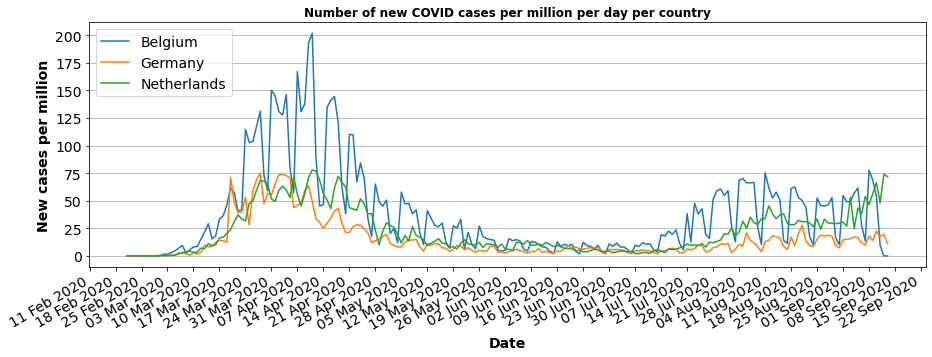

In [10]:
dfplot('new_cases_per_million', title="Number of new COVID cases per million per day per country", xlabel='Date', ylabel='New cases per million', logy=False)

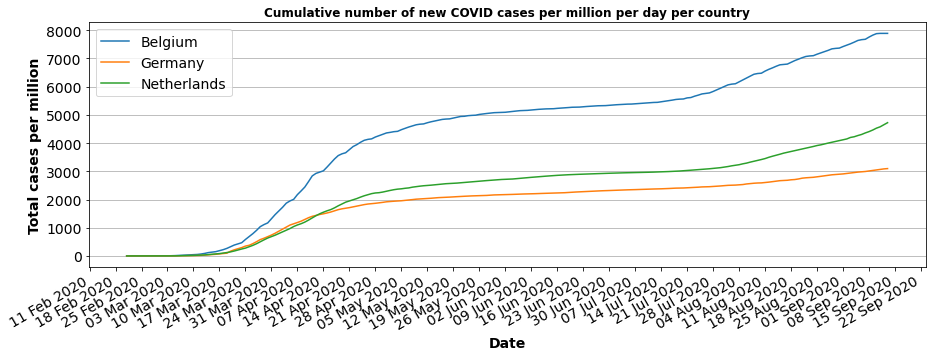

In [11]:
dfplot('total_cases_per_million', title="Cumulative number of new COVID cases per million per day per country", xlabel='Date', ylabel='Total cases per million')

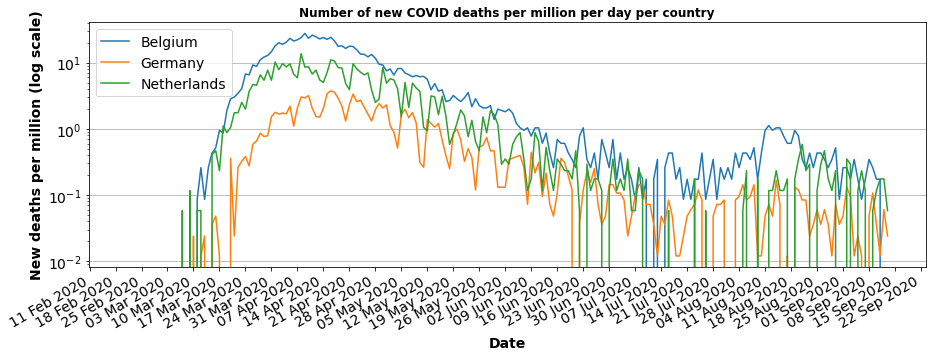

In [12]:
dfplot('new_deaths_per_million', title="Number of new COVID deaths per million per day per country", xlabel='Date', ylabel='New deaths per million (log scale)', logy=True)

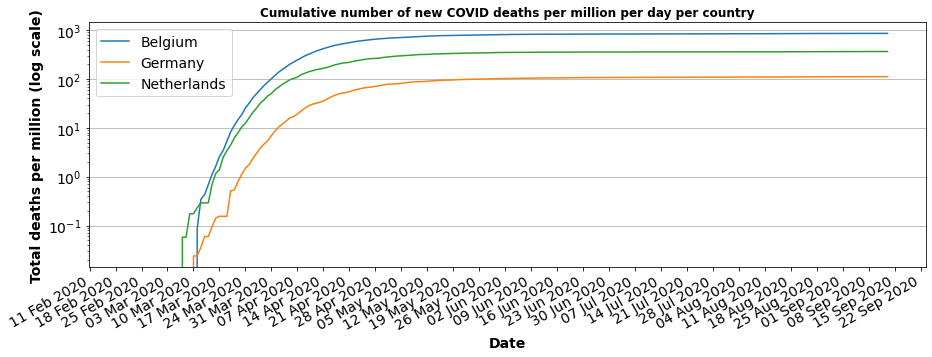

In [13]:
dfplot('total_deaths_per_million', title="Cumulative number of new COVID deaths per million per day per country", xlabel='Date', ylabel='Total deaths per million (log scale)', logy=True)

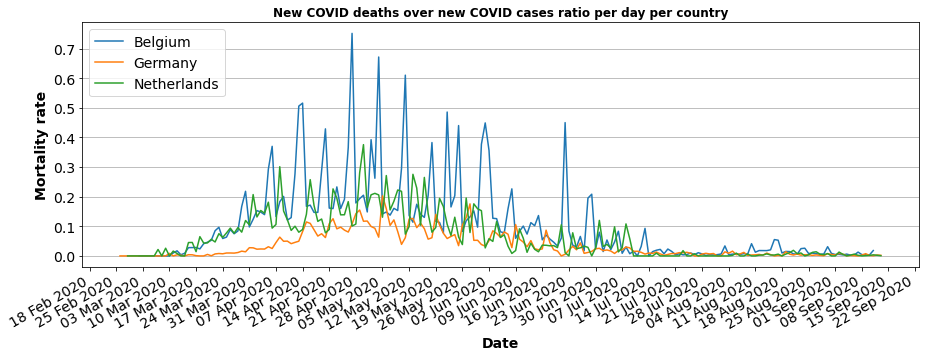

In [14]:
dfplot('mortality_rate', title="New COVID deaths over new COVID cases ratio per day per country", xlabel='Date', ylabel='Mortality rate')

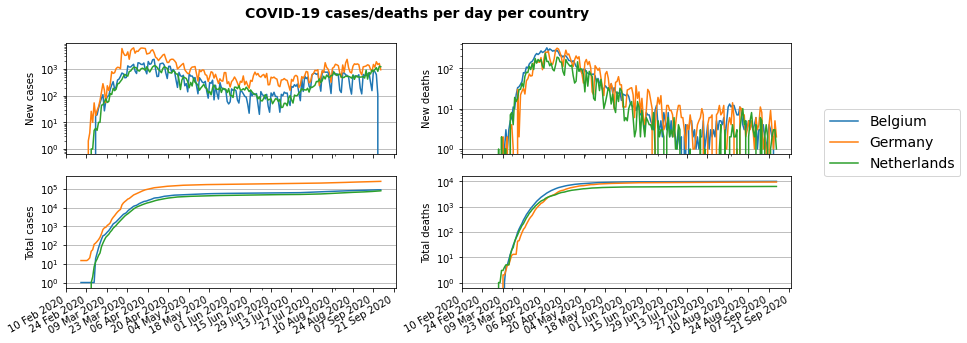

In [15]:
# combine altogether
fig, axs = plt.subplots(2, 2, sharex='col', sharey=False, figsize=(13,5))
(ax1, ax2), (ax3, ax4) = axs
df[df.index > begin_date.date()].groupby('location')['new_cases'].plot(ax=ax1, legend=False, fontsize=14, logy=True)
df[df.index > begin_date.date()].groupby('location')['new_deaths'].plot(ax=ax2, legend=False, fontsize=14, logy=True)
df[df.index > begin_date.date()].groupby('location')['total_cases'].plot(ax=ax3, legend=False, fontsize=14, logy=True)
df[df.index > begin_date.date()].groupby('location')['total_deaths'].plot(ax=ax4, legend=False, fontsize=14, logy=True)
ax1.grid(axis='y'); ax2.grid(axis='y'); ax3.grid(axis='y'); ax4.grid(axis='y')
labels = ['New cases', 'New deaths', 'Total cases', 'Total deaths']
for ax, label in zip(axs.flat, labels):
    ax.set(ylabel=label)
    xstart, xend = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(xstart, xend, 14))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b 2020'))
    ax.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10))
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(10)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(10)
plt.rc('axes', labelsize=12)
plt.legend(loc=(1.1, 1.0), prop={'size': 14})
fig.suptitle('COVID-19 cases/deaths per day per country', fontsize=14, fontweight="bold")
fig.autofmt_xdate()
plt.show()

In [16]:
def myLogFormat(y,pos):
    # Find the number of decimal places required
    decimalplaces = int(np.maximum(-np.log10(y),0))     # =0 for numbers >=1
    # Insert that number into a format string
    formatstring = '{{:.{:1d}f}}'.format(decimalplaces)
    # Return the formatted tick label
    return formatstring.format(y)

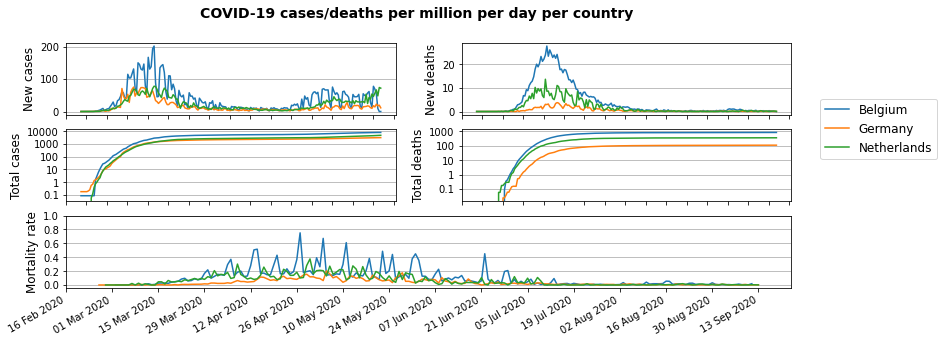

In [17]:
# combine altogether
fig = plt.figure(constrained_layout=True, figsize=(13, 5))
grid = fig.add_gridspec(nrows=3, ncols=2, wspace=0.2, hspace=0.2)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[1, 0])
ax4 = fig.add_subplot(grid[1, 1])
ax5 = fig.add_subplot(grid[2, :])
df[df.index > begin_date.date()].groupby('location')['new_cases_per_million'].plot(ax=ax1, legend=False, fontsize=14, logy=False)
df[df.index > begin_date.date()].groupby('location')['new_deaths_per_million'].plot(ax=ax2, legend=False, fontsize=14, logy=False)
df[df.index > begin_date.date()].groupby('location')['total_cases_per_million'].plot(ax=ax3, legend=False, fontsize=14, logy=True)
df[df.index > begin_date.date()].groupby('location')['total_deaths_per_million'].plot(ax=ax4, legend=False, fontsize=14, logy=True)
df[df.index > begin_date.date()].groupby('location')['mortality_rate_per_million'].plot(ax=ax5, legend=False, fontsize=14, logy=False)
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
# ax5.text(df.index.max()+timedelta(days=30), 0.5,
#          'Mortality rate =\n new deaths / cases', ha="center", va="center", size=12,
#         bbox=bbox_props)
ax1.grid(axis='y'); ax2.grid(axis='y'); ax3.grid(axis='y'); ax4.grid(axis='y'); ax5.grid(axis='y')
axes = [ax1, ax2, ax3, ax4, ax5]
labels = ['New cases', 'New deaths', 'Total cases', 'Total deaths', 'Mortality rate']
for ax, label in zip(axes, labels):
    ax.set_ylabel(label)
    xstart, xend = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(xstart, xend, 14))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b 2020'))
    if ax == ax1:
        ax.yaxis.set_major_locator(ticker.MultipleLocator(base=100))
    elif ax == ax2:
        ax.yaxis.set_major_locator(ticker.MultipleLocator(base=10))
    elif ax in [ax3, ax4]:
        ax.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10))
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(myLogFormat))
    else:
        ax.yaxis.set_ticks(np.arange(0,1.1,0.2))
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(10)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(10)
plt.rc('axes', labelsize=12)
plt.legend(loc=(1.04, 1.78), prop={'size': 12})
fig.suptitle('COVID-19 cases/deaths per million per day per country', fontsize=14, fontweight="bold")
fig.autofmt_xdate()
#plt.savefig("covid-19_cases_per_day_per_country.pdf", papertype = 'a4', orientation = 'portrait', bbox_inches='tight')
plt.show()

### II. NL

In [18]:
df_nl = df.query('iso_code == "NLD"')
df_nl.tail()

iso_code continent     location  total_cases  new_cases  \
2020-09-09      NLD    Europe  Netherlands      76475.0      963.0   
2020-09-10      NLD    Europe  Netherlands      77615.0     1140.0   
2020-09-11      NLD    Europe  Netherlands      78438.0      823.0   
2020-09-12      NLD    Europe  Netherlands      79706.0     1268.0   
2020-09-13      NLD    Europe  Netherlands      80937.0     1231.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
2020-09-09             774.000        6235.0         1.0                2.000   
2020-09-10             806.286        6237.0         2.0                1.571   
2020-09-11             863.714        6240.0         3.0                2.000   
2020-09-12             938.571        6243.0         3.0                2.143   
2020-09-13            1021.000        6244.0         1.0                1.714   

            total_cases_per_million  new_cases_per_million  \
2020-09-09                 4463.120                 56.201   
2020-09-10                 4529.651                 66.531   
2020-09-11                 4577.682                 48.031   
2020-09-12                 4651.683                 74.001   
2020-09-13                 4723.525                 71.842   

            new_cases_smoothed_per_million  total_deaths_per_million  \
2020-09-09                          45.171                   363.878   
2020-09-10                          47.055                   363.995   
2020-09-11                          50.407                   364.170   
2020-09-12                          54.776                   364.345   
2020-09-13                          59.586                   364.403   

            new_deaths_per_million  new_deaths_smoothed_per_million  \
2020-09-09                   0.058                            0.117   
2020-09-10                   0.117                            0.092   
2020-09-11                   0.175                            0.117   
2020-09-12                   0.175                            0.125   
2020-09-13                   0.058                            0.100   

            new_tests  total_tests  total_tests_per_thousand  \
2020-09-09        NaN          NaN                       NaN   
2020-09-10        NaN          NaN                       NaN   
2020-09-11        NaN          NaN                       NaN   
2020-09-12        NaN          NaN                       NaN   
2020-09-13        NaN          NaN                       NaN   

            new_tests_per_thousand  new_tests_smoothed  \
2020-09-09                     NaN                 NaN   
2020-09-10                     NaN                 NaN   
2020-09-11                     NaN                 NaN   
2020-09-12                     NaN                 NaN   
2020-09-13                     NaN                 NaN   

            new_tests_smoothed_per_thousand  tests_per_case  positive_rate  \
2020-09-09                              NaN             NaN            NaN   
2020-09-10                              NaN             NaN            NaN   
2020-09-11                              NaN             NaN            NaN   
2020-09-12                              NaN             NaN            NaN   
2020-09-13                              NaN             NaN            NaN   

           tests_units  stringency_index  population  population_density  \
2020-09-09         NaN             47.22  17134873.0             508.544   
2020-09-10         NaN             47.22  17134873.0             508.544   
2020-09-11         NaN               NaN  17134873.0             508.544   
2020-09-12         NaN               NaN  17134873.0             508.544   
2020-09-13         NaN               NaN  17134873.0             508.544   

            median_age  aged_65_older  aged_70_older  gdp_per_capita  \
2020-09-09        43.2         18.779         11.881       48472.545   
2020-09-10        43.2         18.779         11.881       48472.5

In [64]:
start = pd.to_datetime('2020-09-01', format="%Y-%m-%d")
end = pd.to_datetime('today', format="%Y-%m-%d")
df_nl[start:end]

iso_code continent     location  total_cases  new_cases  \
2020-09-01  NLD      Europe    Netherlands  70596.0      525.0       
2020-09-02  NLD      Europe    Netherlands  71057.0      461.0       
2020-09-03  NLD      Europe    Netherlands  71971.0      914.0       
2020-09-04  NLD      Europe    Netherlands  72392.0      421.0       
2020-09-05  NLD      Europe    Netherlands  73136.0      744.0       
2020-09-06  NLD      Europe    Netherlands  73790.0      654.0       
2020-09-07  NLD      Europe    Netherlands  74715.0      925.0       
2020-09-08  NLD      Europe    Netherlands  75512.0      797.0       
2020-09-09  NLD      Europe    Netherlands  76475.0      963.0       
2020-09-10  NLD      Europe    Netherlands  77615.0      1140.0      
2020-09-11  NLD      Europe    Netherlands  78438.0      823.0       
2020-09-12  NLD      Europe    Netherlands  79706.0      1268.0      
2020-09-13  NLD      Europe    Netherlands  80937.0      1231.0      

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
2020-09-01  504.857             6215.0        0.0         3.143                 
2020-09-02  511.571             6221.0        6.0         3.286                 
2020-09-03  560.714             6226.0        5.0         2.857                 
2020-09-04  548.000             6226.0        0.0         2.429                 
2020-09-05  581.857             6228.0        2.0         2.429                 
2020-09-06  603.857             6232.0        4.0         2.429                 
2020-09-07  663.429             6234.0        2.0         2.714                 
2020-09-08  702.286             6234.0        0.0         2.714                 
2020-09-09  774.000             6235.0        1.0         2.000                 
2020-09-10  806.286             6237.0        2.0         1.571                 
2020-09-11  863.714             6240.0        3.0         2.000                 
2020-09-12  938.571             6243.0        3.0         2.143                 
2020-09-13  1021.000            6244.0        1.0         1.714                 

            total_cases_per_million  new_cases_per_million  \
2020-09-01  4120.019                 30.639                  
2020-09-02  4146.923                 26.904                  
2020-09-03  4200.265                 53.342                  
2020-09-04  4224.834                 24.570                  
2020-09-05  4268.255                 43.420                  
2020-09-06  4306.422                 38.168                  
2020-09-07  4360.406                 53.983                  
2020-09-08  4406.919                 46.513                  
2020-09-09  4463.120                 56.201                  
2020-09-10  4529.651                 66.531                  
2020-09-11  4577.682                 48.031                  
2020-09-12  4651.683                 74.001                  
2020-09-13  4723.525                 71.842                  

            new_cases_smoothed_per_million  total_deaths_per_million  \
2020-09-01  29.464                          362.711                    
2020-09-02  29.856                          363.061                    
2020-09-03  32.724                          363.353                    
2020-09-04  31.982                          363.353                    
2020-09-05  33.957                          363.469                    
2020-09-06  35.241                          363.703                    
2020-09-07  38.718                          363.819                    
2020-09-08  40.986                          363.819                    
2020-09-09  45.171                          363.878                    
2020-09-10  47.055                          363.995                    
2020-09-11  50.407                          364.170                    
2020-09-12  54.776                          364.345                    
2020-09-13  59.586                          364.403                    

            new_d

In [20]:
pd.set_option('display.max_colwidth', -1)
tmnl = pd.read_excel('data/Tijdslijn_Maatregelen_NL.xlsx', parse_dates=True)
tmnl

Datum                                 Beschrijving
0 2020-02-27  Eerste besmetting met COVID-19             
1 2020-03-06  Eerste overlijden als gevolg van COVID-19  
2 2020-03-09  Regering komt met hygiene maatregelen      
3 2020-03-12  Thuisblijven bij klachten                  
4 2020-03-15  Horeca, sportclubs, sauna's, e.d. gesloten 
5 2020-03-16  Alle scholen / kinderdagverblijven gesloten
6 2020-03-23  Start intelligente lockdown                
7 2020-05-11  Basisscholen, kappers, zwembaden open      
8 2020-06-01  Horeca mag weer open (op 1,5 m)            
9 2020-07-01  Evenementen, OV weer toegankelijk

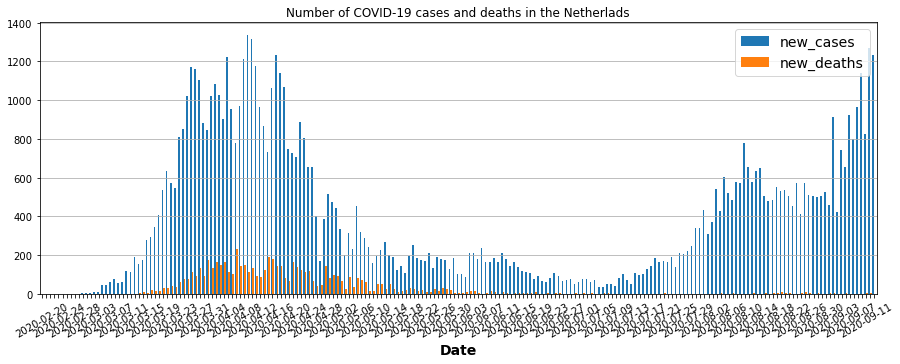

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))
df_nl[['new_cases', 'new_deaths']][begin_date.date():].plot(kind='bar', ax=ax, width=0.8, legend=True)
# fewer date ticks
every_nth = 4
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.title("Number of COVID-19 cases and deaths in the Netherlads")
plt.legend(loc='upper right', prop={'size': 14})
plt.xlabel('Date', fontsize=14, fontweight="bold")
plt.grid(axis='y') 
plt.xticks(rotation=30)
plt.show()

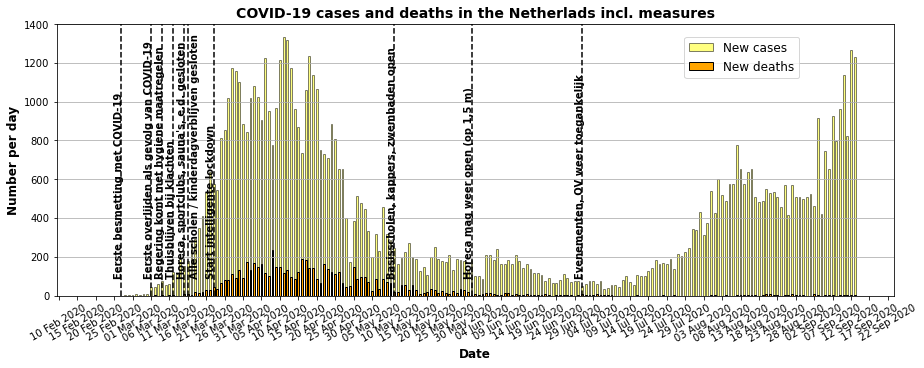

In [63]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(df_nl[begin_date.date():].index, df_nl[begin_date.date():]['new_cases'], width=0.5, alpha=0.5, color='yellow', edgecolor='black', align='center', label='New cases')
ax.bar(df_nl[begin_date.date():].index, df_nl[begin_date.date():]['new_deaths'], width=0.5, alpha=1.0, color='orange', edgecolor='black', align='center', label='New deaths')
# add timeline measures in NL 
for date, measure in zip(tmnl.Datum, tmnl.Beschrijving):
    ax.axvline(x=date.date(), ymax=df_nl['new_cases'].max(), color='black', linestyle='--')
    ax.text(date-timedelta(days=2)+(measure == "Alle scholen / kinderdagverblijven gesloten")*timedelta(days=2.5) \
            , 100, measure, color='black', fontsize=10, weight='heavy', rotation=90)
plt.title("COVID-19 cases and deaths in the Netherlads incl. measures", fontsize=14, fontweight="bold")
plt.legend(loc=(0.75, 0.8), prop={'size': 12})
plt.xlabel('Date', fontsize=12, fontweight="bold")
plt.ylabel('Number per day', fontsize=12, fontweight="bold")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b 2020'))
plt.xticks(rotation=30)
plt.grid(axis='y') 
#plt.savefig("covid-19_nl_incl_maatregelen.pdf", papertype = 'a4', orientation = 'portrait', bbox_inches='tight')
plt.show()

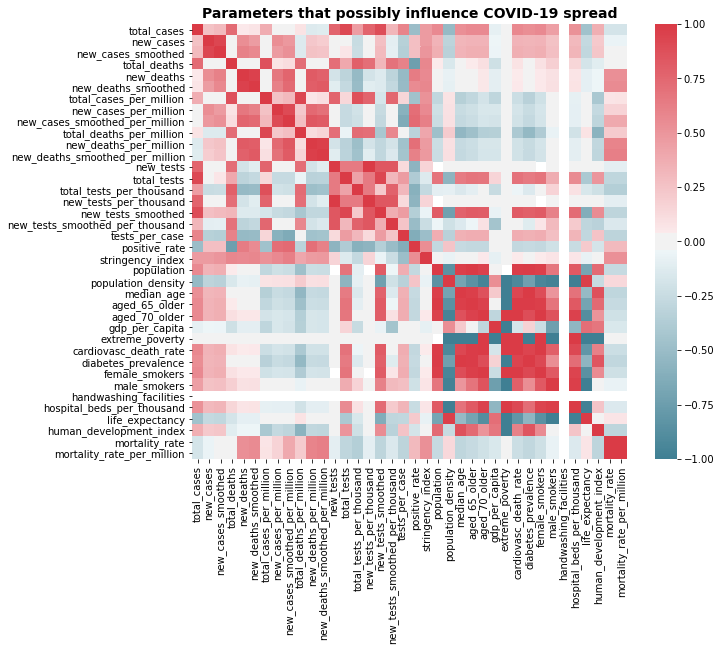

In [23]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr(method='pearson')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title("Parameters that possibly influence COVID-19 spread", fontsize=14, fontweight="bold")
#plt.savefig("covid-19_parameters.pdf", papertype = 'a4', orientation = 'portrait', bbox_inches='tight')
plt.show()

# Interactive plots

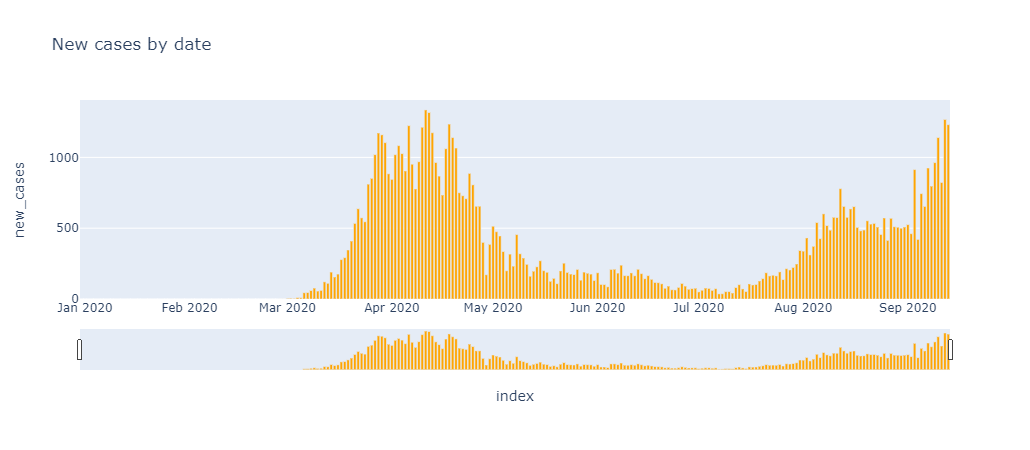

In [24]:
fig = px.bar(df_nl, x = df_nl.index, y = 'new_cases', title='New cases by date')
fig.update_traces(marker_color='orange')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [25]:
countries = df_world[(df_world.new_cases.notnull()) & (df_world.index > begin_date) & (df_world.continent == 'Europe')].reset_index()
countries['date'] = countries.date.dt.strftime('%Y-%m-%d')

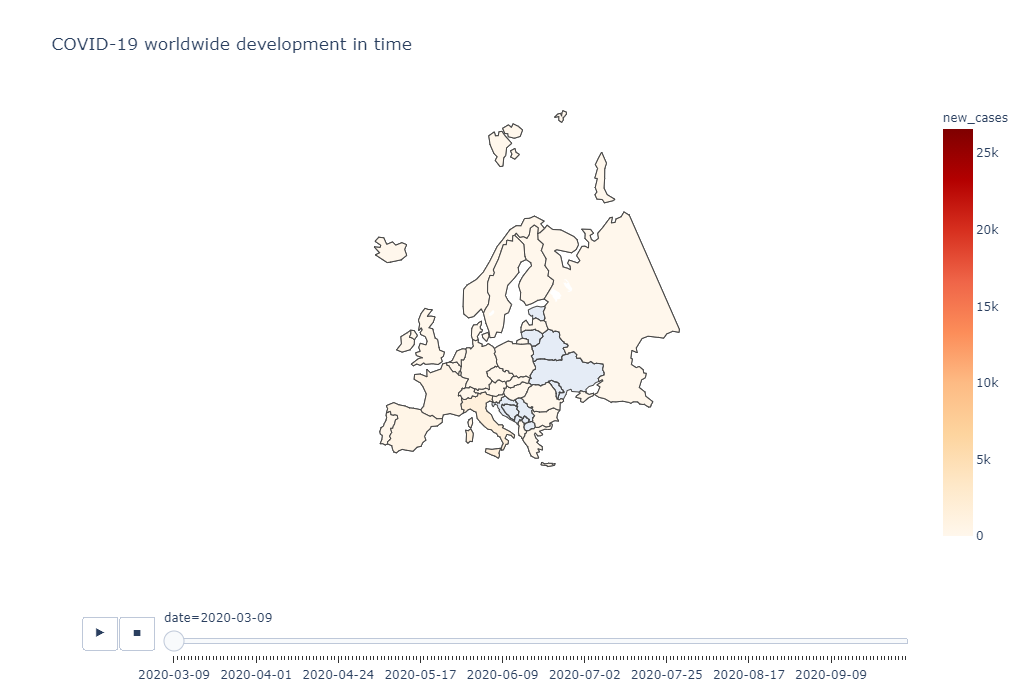

In [26]:
fig = px.choropleth(countries, locations="location",
                    locationmode="country names",
                    color="new_cases",
                    color_continuous_scale='OrRd', #px.colors.diverging.RdYlGn[::-1],
                    range_color=[0, np.max(countries.new_cases)],
                    animation_frame="date",
                    scope="europe",
                    title="COVID-19 worldwide development in time",
                    height=700)
fig.show()

# Predictive modelling

### I. Worldwide (regression)

In [27]:
df_w = df_world.drop_duplicates('location', keep='last')
df_w = df_w.reset_index()
df_w.drop('date', axis=1, inplace=True)
df_w = df_w.tail(-2) # remove World and International
df_w.head()

iso_code      continent             location  total_cases  new_cases  \
2  DZA      Africa         Algeria              48007.0      255.0       
3  AND      Europe         Andorra              1344.0       0.0         
4  AGO      Africa         Angola               3279.0       62.0        
5  AIA      North America  Anguilla             3.0          0.0         
6  ATG      North America  Antigua and Barbuda  95.0         0.0         

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
2  276.571             1605.0        6.0         8.000                 
3  18.429              53.0          0.0         0.000                 
4  57.571              131.0         1.0         2.286                 
5  0.000               0.0           0.0         0.000                 
6  0.000               3.0           0.0         0.000                 

   total_cases_per_million  new_cases_per_million  \
2  1094.774                 5.815                   
3  17394.681                0.000                   
4  99.768                   1.886                   
5  199.973                  0.000                   
6  970.100                  0.000                   

   new_cases_smoothed_per_million  total_deaths_per_million  \
2  6.307                           36.601                     
3  238.511                         685.951                    
4  1.752                           3.986                      
5  0.000                           0.000                      
6  0.000                           30.635                     

   new_deaths_per_million  new_deaths_smoothed_per_million  new_tests  \
2  0.137                   0.182                           NaN          
3  0.000                   0.000                           NaN          
4  0.030                   0.070                           NaN          
5  0.000                   0.000                           NaN          
6  0.000                   0.000                           NaN          

   total_tests  total_tests_per_thousand  new_tests_per_thousand  \
2 NaN          NaN                       NaN                       
3 NaN          NaN                       NaN                       
4 NaN          NaN                       NaN                       
5 NaN          NaN                       NaN                       
6 NaN          NaN                       NaN                       

   new_tests_smoothed  new_tests_smoothed_per_thousand  tests_per_case  \
2 NaN                 NaN                              NaN               
3 NaN                 NaN                              NaN               
4 NaN                 NaN                              NaN               
5 NaN                 NaN                              NaN               
6 NaN                 NaN                              NaN               

   positive_rate tests_units  stringency_index  population  \
2 NaN             NaN        NaN                43851043.0   
3 NaN             NaN        NaN                77265.0      
4 NaN             NaN        NaN                32866268.0   
5 NaN             NaN        NaN                15002.0      
6 NaN             NaN        NaN                97928.0      

   population_density  median_age  aged_65_older  aged_70_older  \
2  17.348              29.1        6.211          3.857           
3  163.755            NaN         NaN            NaN              
4  23.890              16.8        2.405          1.362           
5 NaN                 NaN         NaN            NaN              
6  231.845             32.1        6.933          4.631           

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
2  13913.839       0.5              278.364                 
3 NaN             NaN               109.135                 
4  5819.495       NaN               276.045                 
5 NaN             NaN              NaN                      
6  21490.943      NaN               191.511         

In [28]:
df_w.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [29]:
df_w = df_w.drop(['iso_code', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 
               'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_tests', 
               'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 
               'new_tests_smoothed_per_thousand', 'tests_units', 'stringency_index', 'tests_per_case', 
                  'positive_rate'], axis=1)
df_w.tail()

continent       location  total_cases  new_cases_smoothed  \
207  Asia      Yemen          2011.0       3.429                
208  Africa    Zambia         13466.0      108.143              
209  Africa    Zimbabwe       7508.0       95.857               
210  NaN       World          28802775.0   268757.571           
211  NaN       International  696.0       NaN                   

     new_deaths_smoothed  new_cases_smoothed_per_million  \
207  1.571                0.115                            
208  2.857                5.882                            
209  2.571                6.449                            
210  5800.714             34.479                           
211 NaN                  NaN                               

     new_deaths_smoothed_per_million    population  population_density  \
207  0.053                            2.982597e+07  53.508               
208  0.155                            1.838396e+07  22.995               
209  0.173                            1.486293e+07  42.729               
210  0.744                            7.794799e+09  58.045               
211 NaN                              NaN           NaN                   

     median_age  aged_65_older  aged_70_older  gdp_per_capita  \
207  20.3        2.922          1.583          1479.147         
208  17.7        2.480          1.542          3689.251         
209  19.6        2.822          1.882          1899.775         
210  30.9        8.696          5.355          15469.207        
211 NaN         NaN            NaN            NaN               

     extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
207  18.8             495.003                5.35                  
208  57.5             234.499                3.94                  
209  21.4             307.846                1.82                  
210  10.0             233.070                8.51                  
211 NaN              NaN                    NaN                    

     female_smokers  male_smokers  handwashing_facilities  \
207  7.600           29.200        49.542                   
208  3.100           24.700        13.938                   
209  1.600           30.700        36.791                   
210  6.434           34.635        60.130                   
211 NaN             NaN           NaN                       

     hospital_beds_per_thousand  life_expectancy  human_development_index  
207  0.700                       66.12            0.452                    
208  2.000                       63.89            0.588                    
209  1.700                       61.49            0.535                    
210  2.705                       72.58           NaN                       
211 NaN                         NaN              NaN

In [30]:
print("% of nan values per column")
for column in df_w.columns:
    print(f"{column}: {df_w[column].isna().sum()} / {len(df_w)}")

% of nan values per column
continent: 2 / 210
location: 0 / 210
total_cases: 1 / 210
new_cases_smoothed: 2 / 210
new_deaths_smoothed: 2 / 210
new_cases_smoothed_per_million: 2 / 210
new_deaths_smoothed_per_million: 2 / 210
population: 1 / 210
population_density: 12 / 210
median_age: 25 / 210
aged_65_older: 28 / 210
aged_70_older: 26 / 210
gdp_per_capita: 28 / 210
extreme_poverty: 89 / 210
cardiovasc_death_rate: 26 / 210
diabetes_prevalence: 18 / 210
female_smokers: 70 / 210
male_smokers: 72 / 210
handwashing_facilities: 119 / 210
hospital_beds_per_thousand: 47 / 210
life_expectancy: 4 / 210
human_development_index: 32 / 210


In [31]:
X = df_w.drop('total_cases', axis=1)
y = df_w['total_cases']
y.fillna(0, inplace=True)

In [32]:
y.isnull().values.any()

False

In [33]:
X.head()

continent             location  new_cases_smoothed  \
2  Africa         Algeria              276.571              
3  Europe         Andorra              18.429               
4  Africa         Angola               57.571               
5  North America  Anguilla             0.000                
6  North America  Antigua and Barbuda  0.000                

   new_deaths_smoothed  new_cases_smoothed_per_million  \
2  8.000                6.307                            
3  0.000                238.511                          
4  2.286                1.752                            
5  0.000                0.000                            
6  0.000                0.000                            

   new_deaths_smoothed_per_million  population  population_density  \
2  0.182                            43851043.0  17.348               
3  0.000                            77265.0     163.755              
4  0.070                            32866268.0  23.890               
5  0.000                            15002.0    NaN                   
6  0.000                            97928.0     231.845              

   median_age  aged_65_older  aged_70_older  gdp_per_capita  extreme_poverty  \
2  29.1        6.211          3.857          13913.839       0.5               
3 NaN         NaN            NaN            NaN             NaN                
4  16.8        2.405          1.362          5819.495       NaN                
5 NaN         NaN            NaN            NaN             NaN                
6  32.1        6.933          4.631          21490.943      NaN                

   cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
2  278.364                6.73                 0.7             30.4           
3  109.135                7.97                 29.0            37.8           
4  276.045                3.94                NaN             NaN             
5 NaN                    NaN                  NaN             NaN             
6  191.511                13.17               NaN             NaN             

   handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
2  83.741                  1.9                         76.88             
3 NaN                     NaN                          83.73             
4  26.664                 NaN                          61.15             
5 NaN                     NaN                          81.88             
6 NaN                      3.8                         77.02             

   human_development_index  
2  0.754                    
3  0.858                    
4  0.581                    
5 NaN                       
6  0.780

In [34]:
X.shape

(210, 21)

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 2 to 211
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   continent                        208 non-null    object 
 1   location                         210 non-null    object 
 2   new_cases_smoothed               208 non-null    float64
 3   new_deaths_smoothed              208 non-null    float64
 4   new_cases_smoothed_per_million   208 non-null    float64
 5   new_deaths_smoothed_per_million  208 non-null    float64
 6   population                       209 non-null    float64
 7   population_density               198 non-null    float64
 8   median_age                       185 non-null    float64
 9   aged_65_older                    182 non-null    float64
 10  aged_70_older                    184 non-null    float64
 11  gdp_per_capita                   182 non-null    float64
 12  extreme_poverty       

### Pair correlations

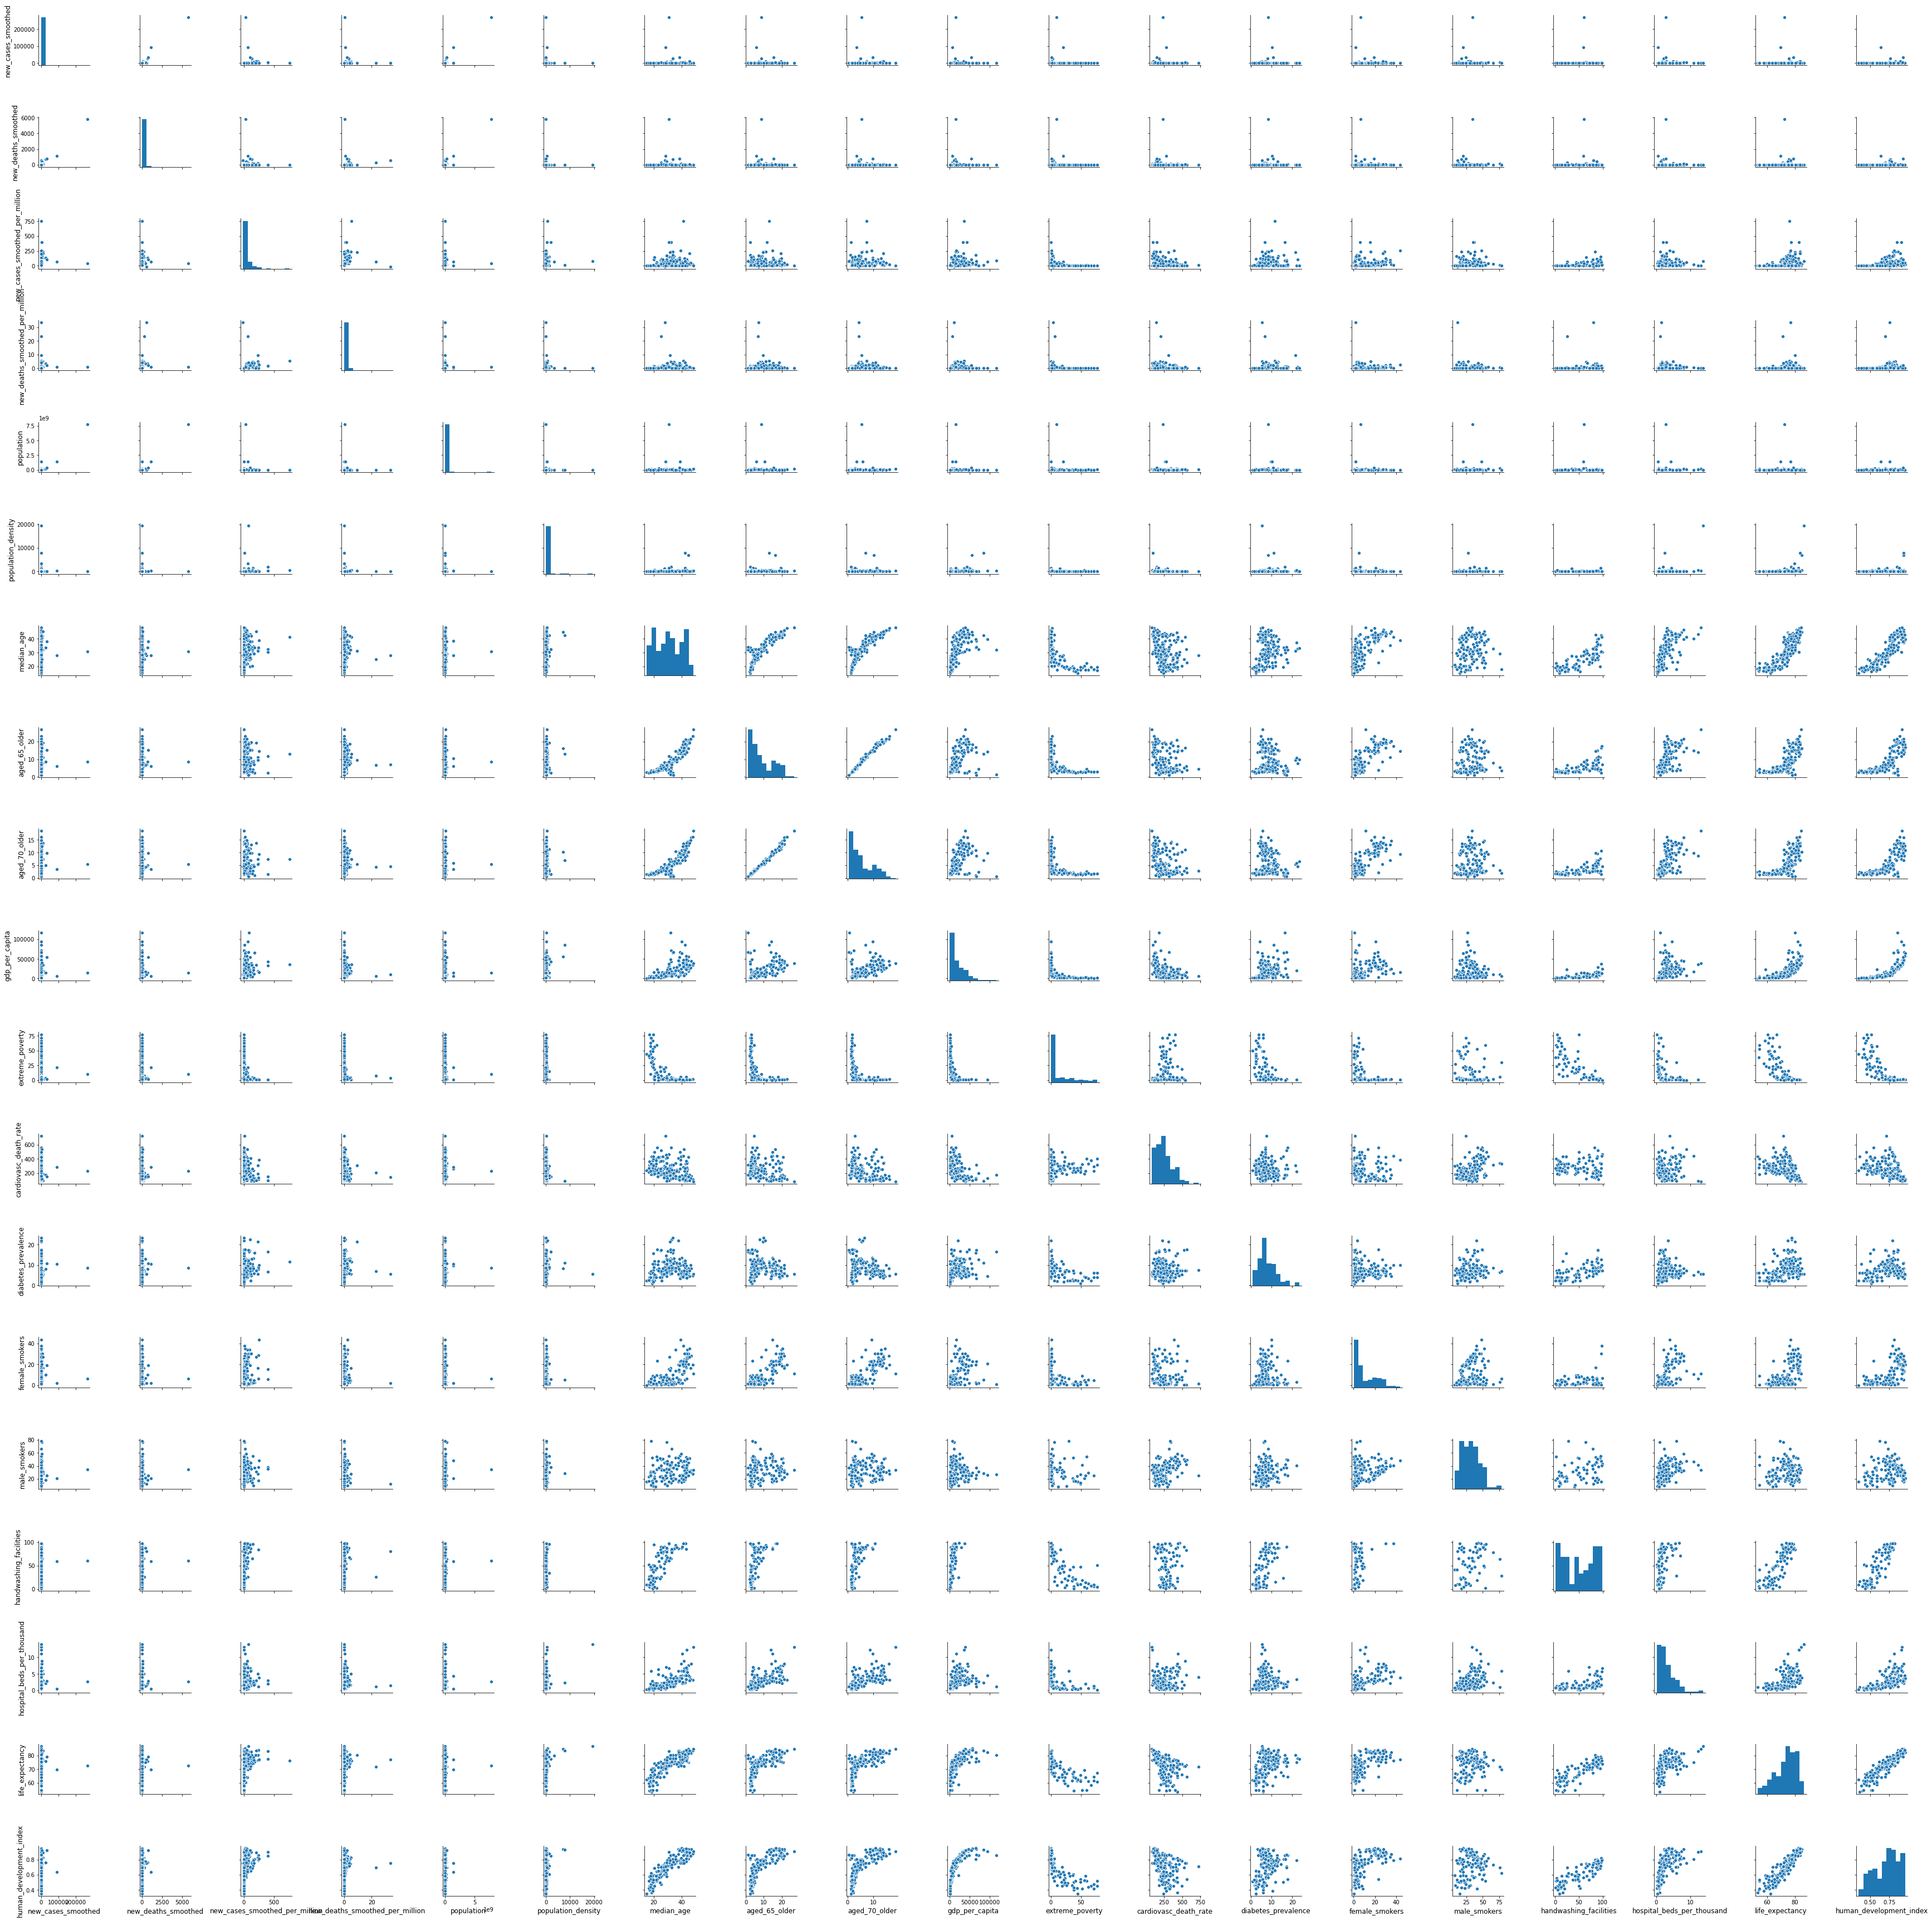

In [36]:
#sns.pairplot(X)

In [37]:
# column normalization
# X_norm = X
# for col in X.columns[2:]:
#     X_norm[col] = stats.boxcox(X[col])[0]
# sns.pairplot(X_norm)

### Model comparison

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

categorical_features = X.columns[0:2].tolist()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = X.columns[2:].tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.65, random_state=42)

models = [DummyRegressor(), SGDRegressor(), ElasticNet()]

for model in models:
    # Append classifier to preprocessing pipeline.
    # Now we have a full prediction pipeline.
    rgr = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    rgr.fit(X_train, y_train)
    
    print(f"Best {model} score: {rgr.score(X_test, y_test):.3f}")

Best DummyRegressor() score: -0.009
Best SGDRegressor() score: 0.871
Best ElasticNet() score: 0.823


### Regressor score vs. test size

Best test size ratio is: 90.0%


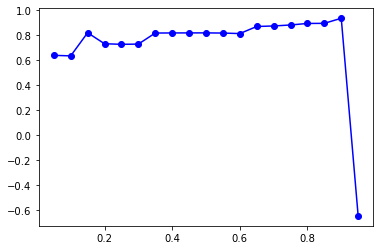

In [39]:
scores = []
sizes = np.linspace(0.05, 0.95, 19)
for size in sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
    regressor = SGDRegressor()
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', regressor)]).fit(X_train, y_train)
    scores.append(pipe.score(X_test, y_test))
 
plt.plot(sizes, scores, '-bo')
print(f"Best test size ratio is: {sizes[np.argmax(scores)]*100}%")

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
parameters = {
             'regressor__loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
             'regressor__penalty': ['l2', 'l1', 'elasticnet'],
             'regressor__alpha': [0.0001, 0.001, 0.01],
             'regressor__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
             }
regressor = SGDRegressor()
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor',  regressor)])
gsrgr = GridSearchCV(pipe, parameters).fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % gsrgr.best_score_)
print(gsrgr.best_params_)
print('R2: ', r2_score(y_pred = gsrgr.predict(X_test), y_true = y_test))

Best parameter (CV score=-1.081):
{'regressor__alpha': 0.01, 'regressor__learning_rate': 'optimal', 'regressor__loss': 'epsilon_insensitive', 'regressor__penalty': 'l1'}
R2:  -0.010759571860215589


In [41]:
regressor = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', SGDRegressor())]).fit(X_train, y_train)
print(f"Model score: {regressor.score(X_test, y_test):.3f}")
print('R2: ', r2_score(y_pred = regressor.predict(X_test), y_true = y_test))

Model score: -0.647
R2:  -0.6472665404625195


In [42]:
# Hyperparameter optimization across multiple models in scikit-learn
# http://www.davidsbatista.net/blog/2018/02/23/model_optimization/
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=2, n_jobs=2, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)])

X_train = preprocessor.fit_transform(X_train)

models = {
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC()
}

params = {
    'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

helper = EstimatorSelectionHelper(models, params)
helper.fit(X_train, y_train, scoring='accuracy')

helper.score_summary(sort_by='max_score')

Running GridSearchCV for ExtraTreesClassifier.
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    1.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Running GridSearchCV for GradientBoostingClassifier.
Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:    6.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:    0.1s finished


Running GridSearchCV for SVC.
Fitting 2 folds for each of 6 candidates, totalling 12 fits
ExtraTreesClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
SVC


estimator  min_score  mean_score  max_score    std_score  \
2   RandomForestClassifier      0          0.00684932  0.0136986  0.00684932    
3   RandomForestClassifier      0          0.00684932  0.0136986  0.00684932    
10  SVC                         0.0135135  0.0136061   0.0136986  9.25583e-05   
11  SVC                         0.0135135  0.0136061   0.0136986  9.25583e-05   
12  SVC                         0.0135135  0.0136061   0.0136986  9.25583e-05   
13  SVC                         0.0135135  0.0136061   0.0136986  9.25583e-05   
14  SVC                         0.0135135  0.0136061   0.0136986  9.25583e-05   
15  SVC                         0.0135135  0.0136061   0.0136986  9.25583e-05   
0   ExtraTreesClassifier        0          0.00675676  0.0135135  0.00675676    
1   ExtraTreesClassifier        0          0.00675676  0.0135135  0.00675676    
6   GradientBoostingClassifier  0          0.00675676  0.0135135  0.00675676    
7   GradientBoostingClassifier  0          0.00675676  0.0135135  0.00675676    
8   GradientBoostingClassifier  0          0.00675676  0.0135135  0.00675676    
9   GradientBoostingClassifier  0          0.00675676  0.0135135  0.00675676    
4   AdaBoostClassifier          0          0           0          0             
5   AdaBoostClassifier          0          0           0          0             

   n_estimators learning_rate    C  kernel   gamma  
2   16           NaN           NaN  NaN     NaN     
3   32           NaN           NaN  NaN     NaN     
10  NaN          NaN           1    linear  NaN     
11  NaN          NaN           10   linear  NaN     
12  NaN          NaN           1    rbf     0.001   
13  NaN          NaN           1    rbf     0.0001  
14  NaN          NaN           10   rbf     0.001   
15  NaN          NaN           10   rbf     0.0001  
0   16           NaN           NaN  NaN     NaN     
1   32           NaN           NaN  NaN     NaN     
6   16           0.8           NaN  NaN     NaN     
7   32           0.8           NaN  NaN     NaN     
8   16           1             NaN  NaN     NaN     
9   32           1             NaN  NaN     NaN     
4   16           NaN           NaN  NaN     NaN     
5   32           NaN           NaN  NaN     NaN

### II. NL (forecasting with sktime)

In [44]:
df_nl.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  258.000000    258.000000   252.000000          258.000000     
mean   31812.488372  313.709302   308.048742          3530.860465    
std    25671.840227  354.496142   334.496984          2789.309789    
min    0.000000      0.000000     0.000000            0.000000       
25%    30.500000     10.000000    33.464250           0.000000       
50%    41546.500000  174.000000   173.428500          5246.000000    
75%    50829.500000  513.000000   512.000000          6135.000000    
max    80937.000000  1335.000000  1119.857000         6244.000000    

       new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  258.000000  252.000000           258.000000                
mean   24.201550   24.754528            1856.593190               
std    45.845346   43.646063            1498.221792               
min    0.000000    0.000000             0.000000                  
25%    0.000000    0.000000             1.780000                  
50%    2.000000    2.571000             2424.675000               
75%    18.750000   20.321750            2966.436000               
max    234.000000  153.571000           4723.525000               

       new_cases_per_million  new_cases_smoothed_per_million  \
count  258.000000             252.000000                       
mean   18.308213              17.977885                        
std    20.688558              19.521416                        
min    0.000000               0.000000                         
25%    0.584000               1.953000                         
50%    10.154500              10.121500                        
75%    29.938750              29.880500                        
max    77.911000              65.355000                        

       total_deaths_per_million  new_deaths_per_million  \
count  258.000000                258.000000               
mean   206.062845                1.412391                 
std    162.785572                2.675528                 
min    0.000000                  0.000000                 
25%    0.000000                  0.000000                 
50%    306.159000                0.117000                 
75%    358.042000                1.094250                 
max    364.403000                13.656000                

       new_deaths_smoothed_per_million  new_tests   total_tests  \
count  252.000000                       0.0        2.600000e+01   
mean   1.444659                        NaN         6.222912e+05   
std    2.547223                        NaN         5.318285e+05   
min    0.000000                        NaN         1.708000e+04   
25%    0.000000                        NaN         2.169565e+05   
50%    0.150000                        NaN         4.539170e+05   
75%    1.186000                        NaN         9.390730e+05   
max    8.963000                        NaN         1.832451e+06   

       total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
count  26.000000                 0.0                     169.000000           
mean   36.317154                NaN                      10274.266272         
std    31.037825                NaN                      6561.958158          
min    0.997000                 NaN                      3048.000000          
25%    12.661500                NaN                      4591.000000          
50%    26.491000                NaN                      9111.000000          
75%    54.804500                NaN                      16249.000000         
max    106.943000               NaN                      26165.000000         

       new_tests_smoothed_per_thousand  tests_per_case  positive_rate  \
count  169.000000                       169.000000      169.000000      
mean   0.599580                         51.749438       0.066964        
std    0.382951                         51.817707       0.076362        
min    0.178000                         3.712000        

In [45]:
print("% of nan values per column")
for column in df_nl.columns:
    print(f"{column}: {df_nl[column].isna().sum()} / {len(df_nl)}")

% of nan values per column
iso_code: 0 / 258
continent: 0 / 258
location: 0 / 258
total_cases: 0 / 258
new_cases: 0 / 258
new_cases_smoothed: 6 / 258
total_deaths: 0 / 258
new_deaths: 0 / 258
new_deaths_smoothed: 6 / 258
total_cases_per_million: 0 / 258
new_cases_per_million: 0 / 258
new_cases_smoothed_per_million: 6 / 258
total_deaths_per_million: 0 / 258
new_deaths_per_million: 0 / 258
new_deaths_smoothed_per_million: 6 / 258
new_tests: 258 / 258
total_tests: 232 / 258
total_tests_per_thousand: 232 / 258
new_tests_per_thousand: 258 / 258
new_tests_smoothed: 89 / 258
new_tests_smoothed_per_thousand: 89 / 258
tests_per_case: 89 / 258
positive_rate: 89 / 258
tests_units: 82 / 258
stringency_index: 4 / 258
population: 0 / 258
population_density: 0 / 258
median_age: 0 / 258
aged_65_older: 0 / 258
aged_70_older: 0 / 258
gdp_per_capita: 0 / 258
extreme_poverty: 258 / 258
cardiovasc_death_rate: 0 / 258
diabetes_prevalence: 0 / 258
female_smokers: 0 / 258
male_smokers: 0 / 258
handwashing_fac

In [46]:
data = df_nl.drop(['iso_code', 'continent', 'location', 'new_tests', 'new_tests_per_thousand', 'total_tests', 'total_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units', 'extreme_poverty', 'handwashing_facilities'], axis=1)

In [47]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from sktime.utils.plotting.forecasting import plot_ys

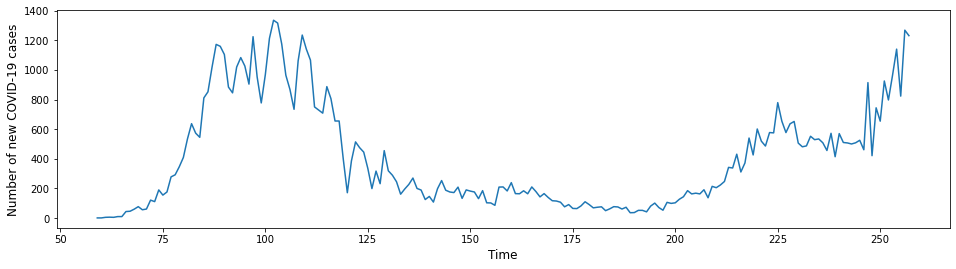

In [48]:
y = df_nl.reset_index()['new_cases']
y = y[y>0]
fig, ax = plot_ys(y)
ax.set(xlabel="Time", ylabel="Number of new COVID-19 cases");

179 20


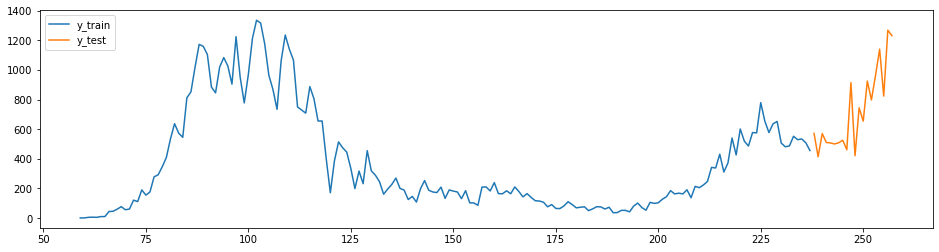

In [49]:
y_train, y_test = temporal_train_test_split(y, test_size=20)
plot_ys(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [50]:
fh = np.arange(len(y_test)) + 1

0.34210254007692253

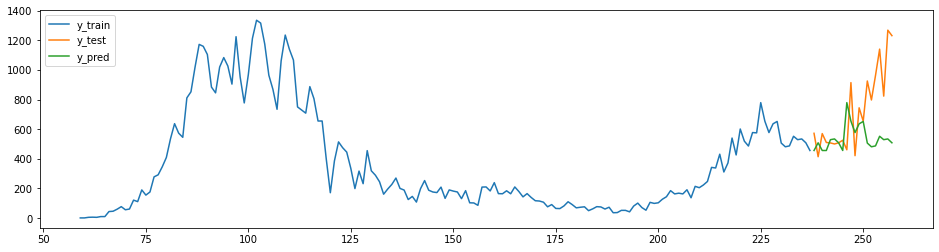

In [51]:
from sktime.forecasting.compose import ReducedRegressionForecaster
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = ReducedRegressionForecaster(regressor=regressor, window_length=12, strategy="recursive")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

0.5176279164162171

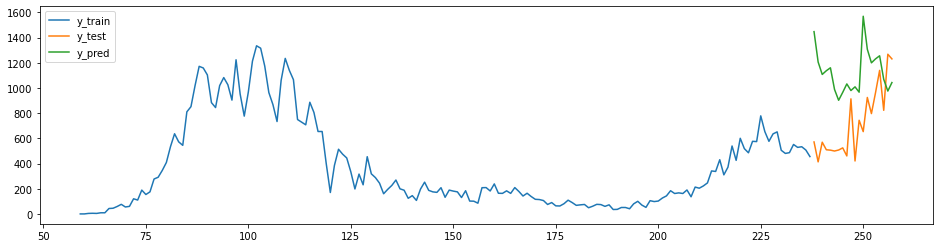

In [52]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend="add", seasonal="multiplicative", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

0.39643943623342837

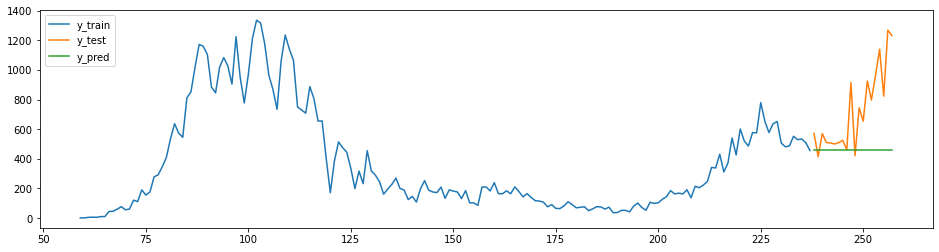

In [53]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

0.33322402789377625

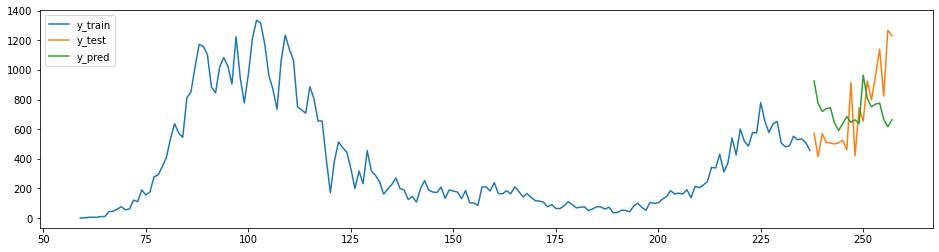

In [54]:
from sktime.forecasting.compose import EnsembleForecaster
forecaster = EnsembleForecaster([
    ("ses", ExponentialSmoothing(seasonal="multiplicative", sp=12)),
    ("holt", ExponentialSmoothing(trend="add", damped=False, seasonal="multiplicative", sp=12)),
    ("damped", ExponentialSmoothing(trend="add", damped=True, seasonal="multiplicative", sp=12))
])
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

In [55]:
from sktime.forecasting.model_selection import SlidingWindowSplitter, ForecastingGridSearchCV

forecaster = ReducedRegressionForecaster(regressor=regressor, window_length=15, strategy="recursive")
param_grid = {"window_length": [5, 10, 15]}

# we fit the forecaster on the initial window, and then use temporal cross-validation to find the optimal parameter
cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5))
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv.fit(y_train)
y_pred = gscv.predict(fh)

0.3418145761073733

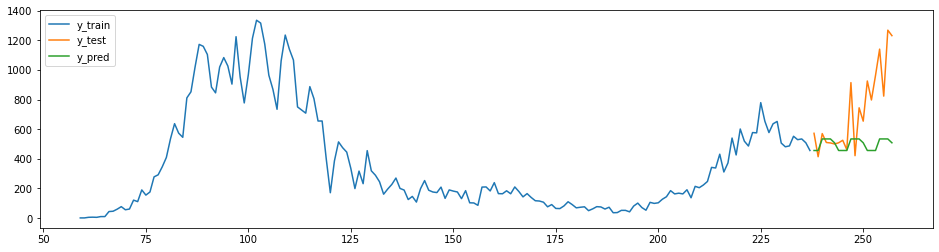

In [56]:
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

In [57]:
gscv.best_params_

{'window_length': 5}

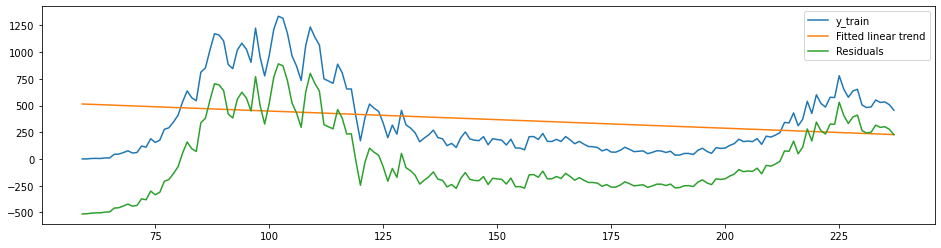

In [58]:
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformers.single_series.detrend import Detrender

# liner detrending
forecaster = PolynomialTrendForecaster(degree=1)
transformer = Detrender(forecaster=forecaster)
yt = transformer.fit_transform(y_train)

# internally, the Detrender uses the in-sample predictions of the PolynomialTrendForecaster
forecaster = PolynomialTrendForecaster(degree=1)
fh_ins = -np.arange(len(y_train)) # in-sample forecasting horizon
y_pred = forecaster.fit(y_train).predict(fh=fh_ins)

plot_ys(y_train, y_pred, yt, labels=["y_train", "Fitted linear trend", "Residuals"]);

0.3793773470949686

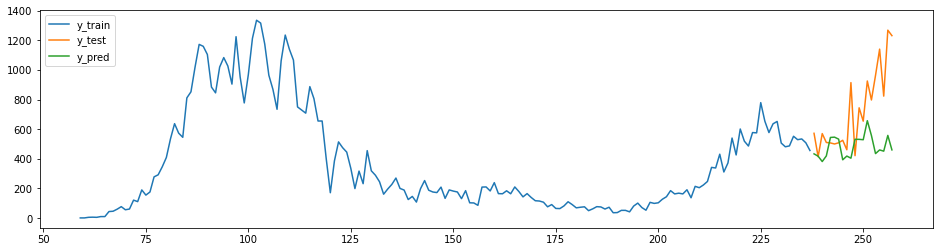

In [59]:
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformers.single_series.detrend import Deseasonalizer

forecaster = TransformedTargetForecaster([
    ("deseasonalise", Deseasonalizer(model="multiplicative", sp=12)),
    ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
    ("forecast", ReducedRegressionForecaster(regressor=regressor, window_length=15, strategy="recursive"))
])
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

In [60]:
from sktime.forecasting.naive import NaiveForecaster
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
cv = SlidingWindowSplitter(fh=1)
y_pred = forecaster.update_predict(y_test, cv)
smape_loss(y_test, y_pred)

0.2440306916103346

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x207b0571e08>)

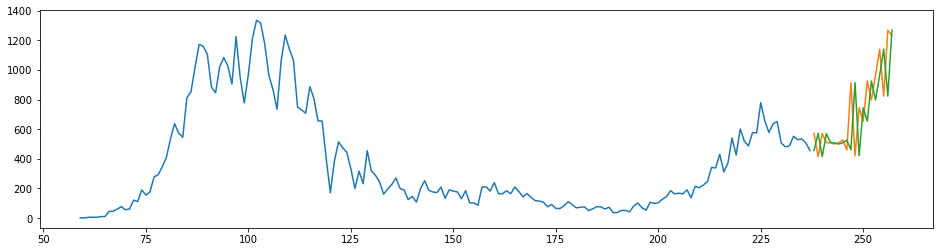

In [61]:
plot_ys(y_train, y_test, y_pred)

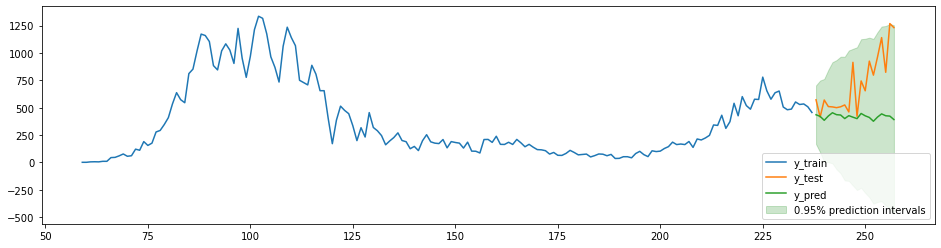

In [62]:
from sktime.forecasting.theta import ThetaForecaster
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)
alpha = 0.05  # 95% prediction intervals
y_pred, pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)
smape_loss(y_test, y_pred)

fig, ax = plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(y_pred.index, pred_ints["lower"], pred_ints["upper"], alpha=0.2, color="green", label=f"{1 - alpha}% prediction intervals")
plt.legend();